#shubham kumar sharma

#Data science intern @TSF grip  ---- Task 4

#Perform EDA on terrorist dataset

find out the hot zone of terrorism?

Motives for terrorism?

Who are the main targets?

Hot zones of terrorism by country and city?

Attack method used?

insights derived from EDA

# Installing required libraries


In [69]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import os


#Reading terrorism dataset

In [70]:
#read data using read_csv
data = pd.read_csv('/content/globalterrorismdb_0718dist.csv', encoding ='latin-1')

In [71]:
data.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [67]:
data.shape

(181691, 18)

In [5]:
#number of rows and coloums

print(f'number of rows are  {data.shape[0]} and number of coloumns are {data.shape[1]}')

number of rows are  181691 and number of coloumns are 135


In [6]:
#descriptive stat
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


From describe , we can say there are outliers present in data['country'] ,  ransomtus, ransompadius and nreleased

##Data preprocessing and cleaning

In [7]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [72]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [73]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                       'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                       'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
data=data[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType',
               'Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]


In [74]:
data.sample(10)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
108935,2012,6,26,Iraq,Middle East & North Africa,Baqubah,33.743240,44.623825,Bombing/Explosion,0.0,2.0,Patrol,06/26/2012: A roadside bomb detonated targetin...,Unknown,Military,Explosives,NaN
30796,1987,4,21,Peru,South America,Lima,-11.967368,-76.978462,Bombing/Explosion,NaN,NaN,Bank,NaN,Shining Path (SL),Business,Explosives,NaN
158674,2016,2,8,Afghanistan,South Asia,Yahya Khel district,32.921305,68.647104,Bombing/Explosion,7.0,9.0,Employees,02/08/2016: A suicide bomber detonated targeti...,Taliban,Government (General),Explosives,NaN
62945,1996,7,24,Turkey,Middle East & North Africa,Gebze,40.802277,29.440664,Assassination,1.0,1.0,Antiterrorist Policeman,NaN,Unknown,Police,Firearms,NaN
178406,2017,8,28,Colombia,South America,El Carmen district,8.512538,-73.458678,Bombing/Explosion,0.0,0.0,Cano Limon-Covenas Oil Pipeline,08/28/2017: An explosive device detonated targ...,National Liberation Army of Colombia (ELN),Utilities,Explosives,NaN
111522,2012,10,11,Pakistan,South Asia,Mishti Mela,33.733414,70.871022,Bombing/Explosion,2.0,14.0,Market,10/11/2012: An explosive device detonated in a...,Tehrik-i-Taliban Pakistan (TTP),Private Citizens & Property,Explosives,NaN
151007,2015,7,24,India,South Asia,Gabarapara,17.710984,83.239285,Hostage Taking (Kidnapping),1.0,2.0,Suspected Informants,07/24/2015: Assailants attacked Gabarapara vil...,Communist Party of India - Maoist (CPI-Maoist),Private Citizens & Property,Explosives,"The specific motive is unknown; however, sourc..."
37587,1989,3,14,Spain,Western Europe,Vitoria,42.849640,-2.692359,Bombing/Explosion,0.0,0.0,Army supply store,NaN,Basque Fatherland and Freedom (ETA),Military,Explosives,NaN
116660,2013,5,2,Pakistan,South Asia,Karachi,24.891115,67.143311,Bombing/Explosion,0.0,8.0,Elections Office,05/02/2013: Assailants detonated an explosive ...,Tehrik-i-Taliban Pakistan (TTP),Violent Political Party,Explosives,"Ehsanullah Ehsan, a spokesperson for the Tehri..."
125251,2013,12,30,Iraq,Middle East & North Africa,Tikrit,34.621521,43.668377,Bombing/Explosion,0.0,0.0,Building,12/30/2013: An explosives-laden vehicle was di...,Unknown,Business,Explosives,NaN


In [75]:
data['Summary'].dropna()

5         1/1/1970: Unknown African American assailants ...
7         1/2/1970: Unknown perpetrators detonated explo...
8         1/2/1970: Karl Armstrong, a member of the New ...
9         1/3/1970: Karl Armstrong, a member of the New ...
11        1/6/1970: Unknown perpetrators threw a Molotov...
                                ...                        
181686    12/31/2017: Assailants opened fire on a Somali...
181687    12/31/2017: Assailants launched mortars at the...
181688    12/31/2017: Assailants set fire to houses in K...
181689    12/31/2017: Assailants threw a grenade at a Fo...
181690    12/31/2017: An explosive device was discovered...
Name: Summary, Length: 115562, dtype: object

In [76]:
data["Killed"]=data["Killed"].fillna(0)
data["Wounded"]=data["Wounded"].fillna(0)
data["TotalDamage"]=data["Killed"]+data["Wounded"]
data['Weapon_type'] = data['Weapon_type'].replace(['Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'],'Vehicles')


In [12]:
data.head(5)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,TotalDamage
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0.0
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0.0


##Data analysis

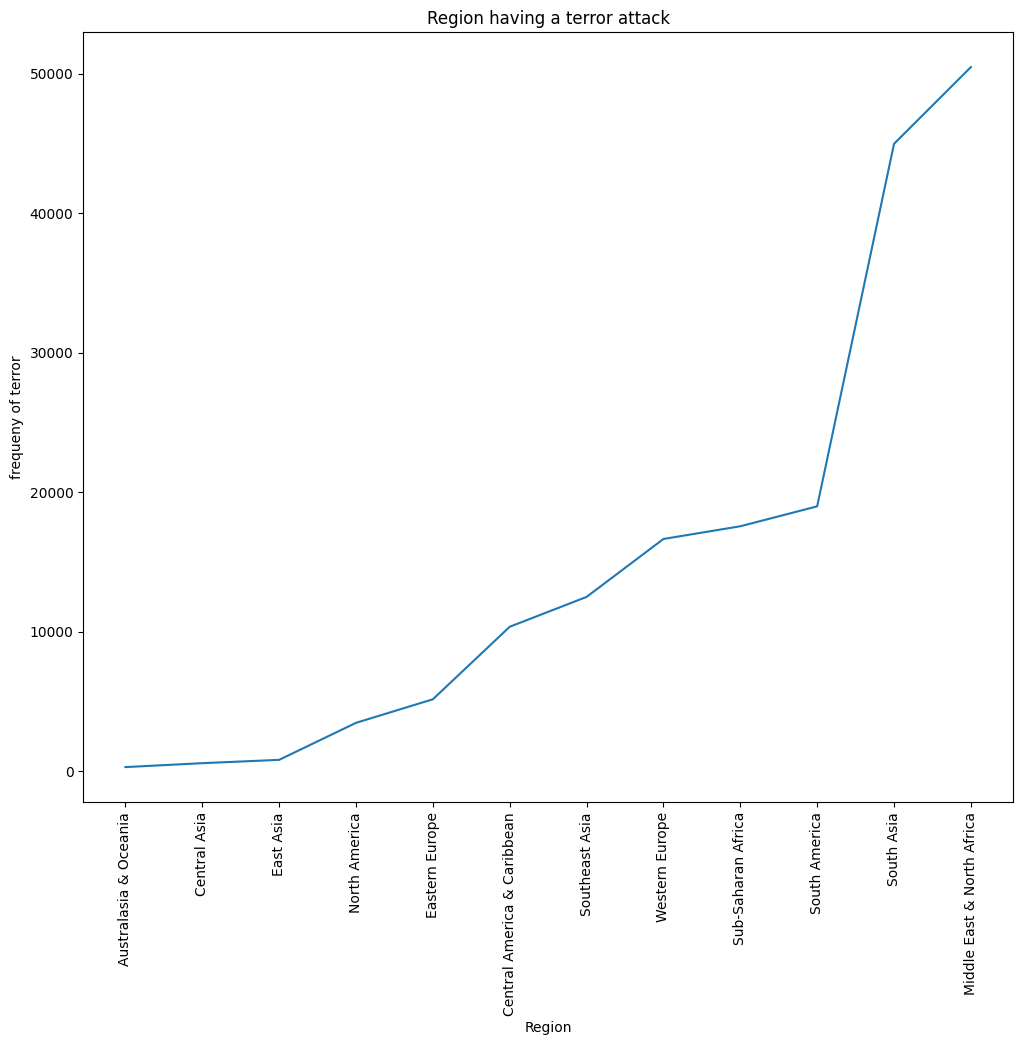

In [46]:
#region having highest terrorist attack
plt.figure(figsize=(12, 10))
x=data['Region'].value_counts().sort_values().index
y=data['Region'].value_counts().sort_values()
plt.title('Region having a terror attack')
plt.xlabel('Region')
plt.ylabel('frequeny of terror')
plt.xticks(rotation =90)
plt.plot(x, y)


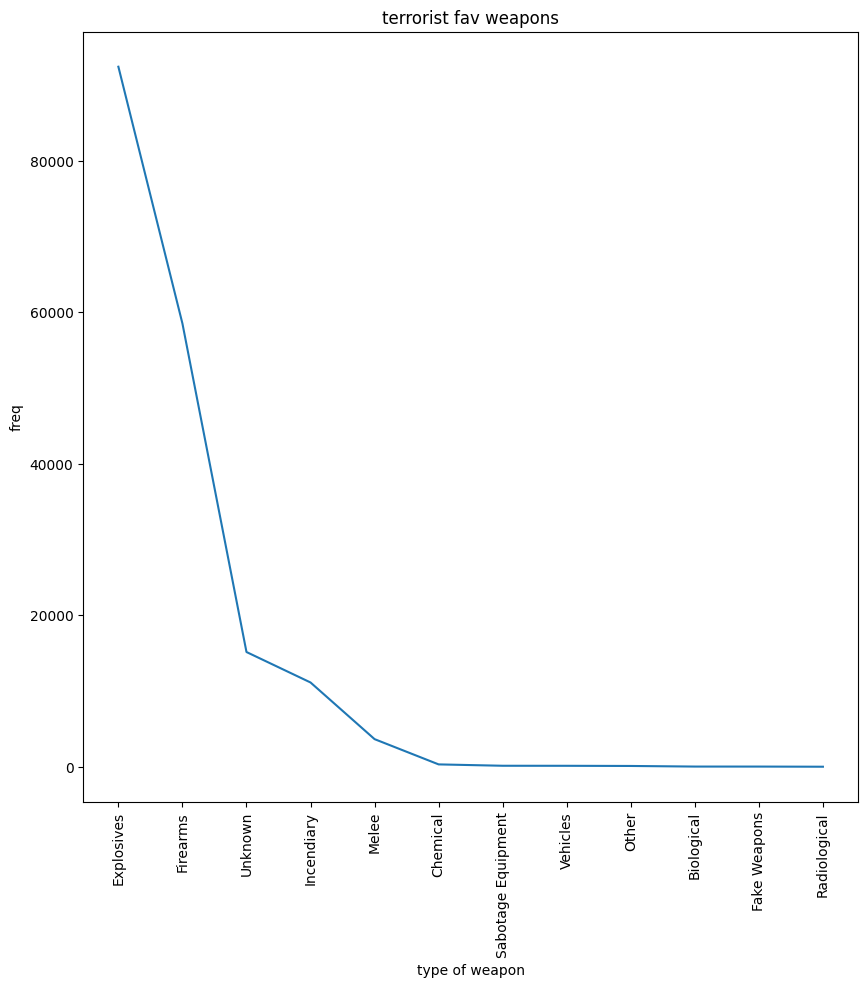

In [44]:
#most weapon used by terrorist
plt.figure(figsize=(10, 10))
plt.plot(data['Weapon_type'].value_counts().index, data['Weapon_type'].value_counts())
plt.title('terrorist fav weapons')
plt.xlabel('type of weapon')
plt.ylabel('freq')
plt.xticks(rotation = 90)
plt.show()


In [80]:
#motive for terrorism
motive = data[data['Motive'].notna()]
x=pd.DataFrame(motive['Motive'])
x

,Motive
5,To protest the Cairo Illinois Police Deparment
8,To protest the War in Vietnam and the draft
9,To protest the War in Vietnam and the draft
11,Protest the draft and Vietnam War
14,To protest United States owned businesses in P...
...,...
181663,"The specific motive is unknown; however, sourc..."
181665,"The specific motive is unknown; however, sourc..."
181672,"The specific motive is unknown; however, sourc..."
181682,"The specific motive is unknown; however, sourc..."


In [15]:

import plotly.graph_objects as go
import plotly.express as px
colors = ['lightslategray',] * 11
colors[0] = 'red'
x=data['Weapon_type'].value_counts().index
y=data['Weapon_type'].value_counts()
fig = go.Figure(data=[go.Bar(x=x.tolist(), y=y.tolist(),marker_color=colors,text=y, textposition='auto'  )])
fig.update_layout(title_text='Weapons used by terrorists', xaxis_title="Weapons",
    yaxis_title="Sum of occurences",)

Text(0.5, 1.0, 'most worst group')

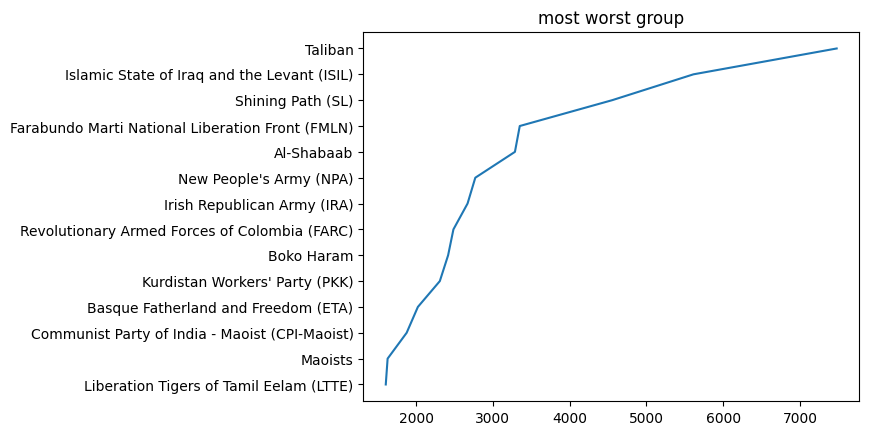

In [16]:
#groups
plt.plot(data['Group'].value_counts()[1:15].sort_values().values, data['Group'].value_counts()[1:15].sort_values().index )
plt.title("most worst group")

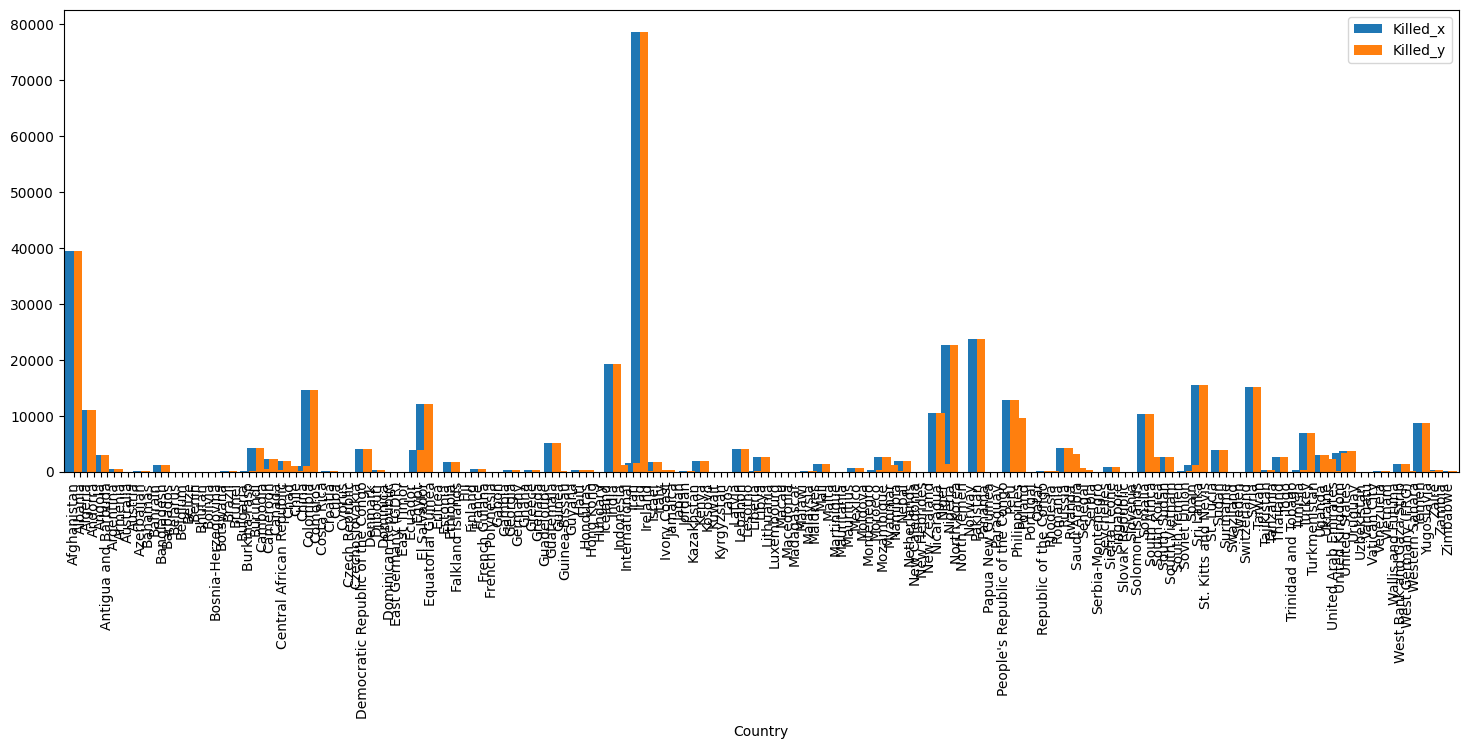

In [26]:
country_att= data['Country'].value_counts()[:15].to_frame()
country_att.columns=['Attacks']
country_att =data.groupby('Country')['Killed'].sum().to_frame()
country_att.merge(country_att,left_index=True,right_index=True,how='left').plot.bar(width=2.5)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

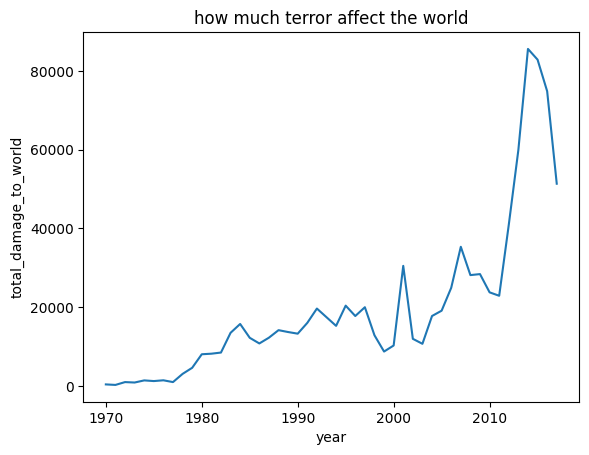

In [30]:
affect=data.groupby(by=["Year"], dropna=False,as_index=False)
affect=affect.sum()
plt.plot(affect['Year'],affect['TotalDamage'])
plt.title('how much terror affect the world')
plt.xlabel('year')
plt.ylabel('total_damage_to_world')
plt.show()

In [33]:
damage =data['TotalDamage'].iloc[:].sum()
print(f'total damage to world is {damage}')

total damage to world is 935737.0


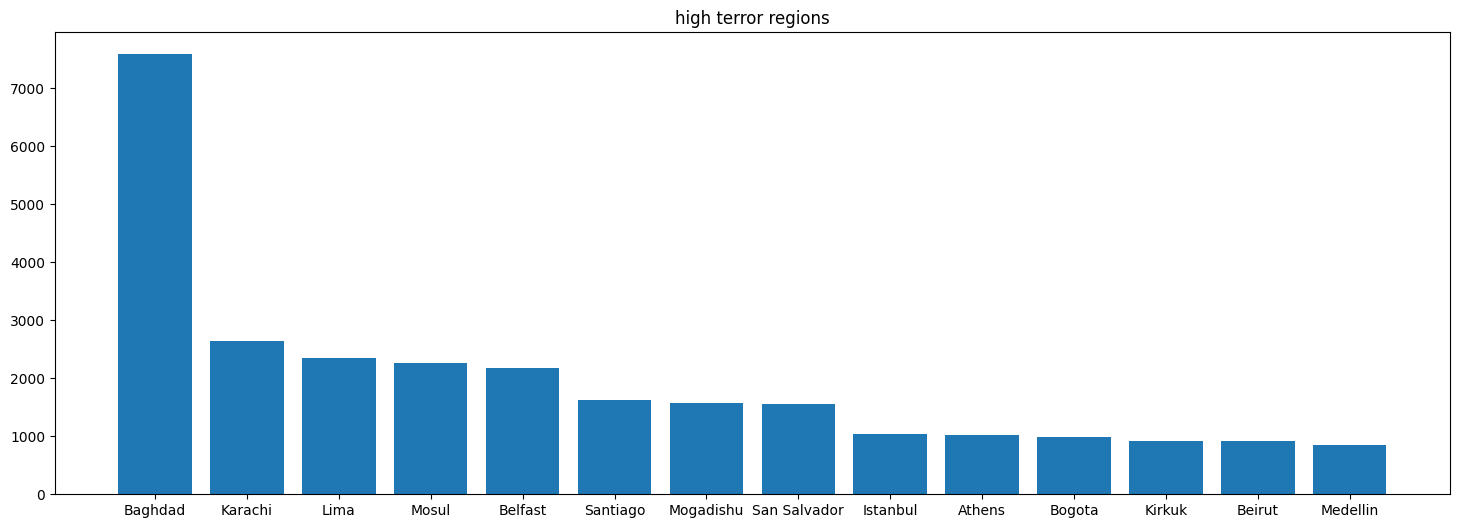

In [38]:
#highest terrorist zones
plt.subplots(figsize=(18,6))
plt.bar(data['city'].value_counts()[1:15].index,data['city'].value_counts()[1:15].values)
plt.title('high terror regions')
plt.show()

In [43]:
data['Killed'].sum()

411868.0

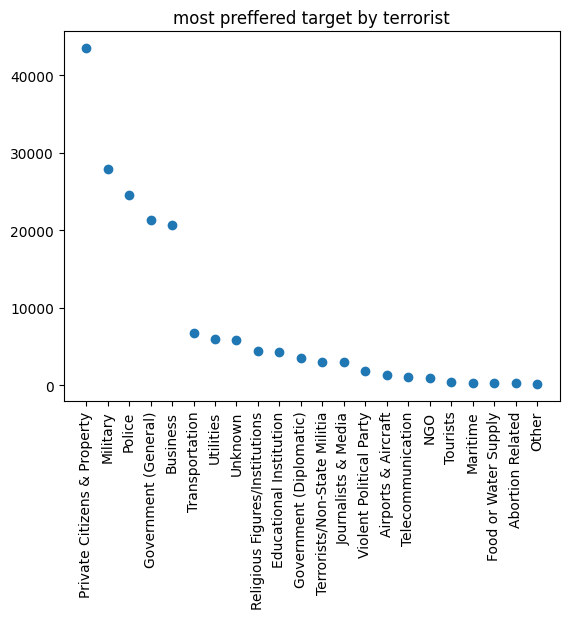

In [49]:
#most preffered target by terrorist
plt.scatter(data['Target_type'].value_counts().index, data['Target_type'].value_counts())
plt.title('most preffered target by terrorist')
plt.xticks(rotation = 90)
plt.show()

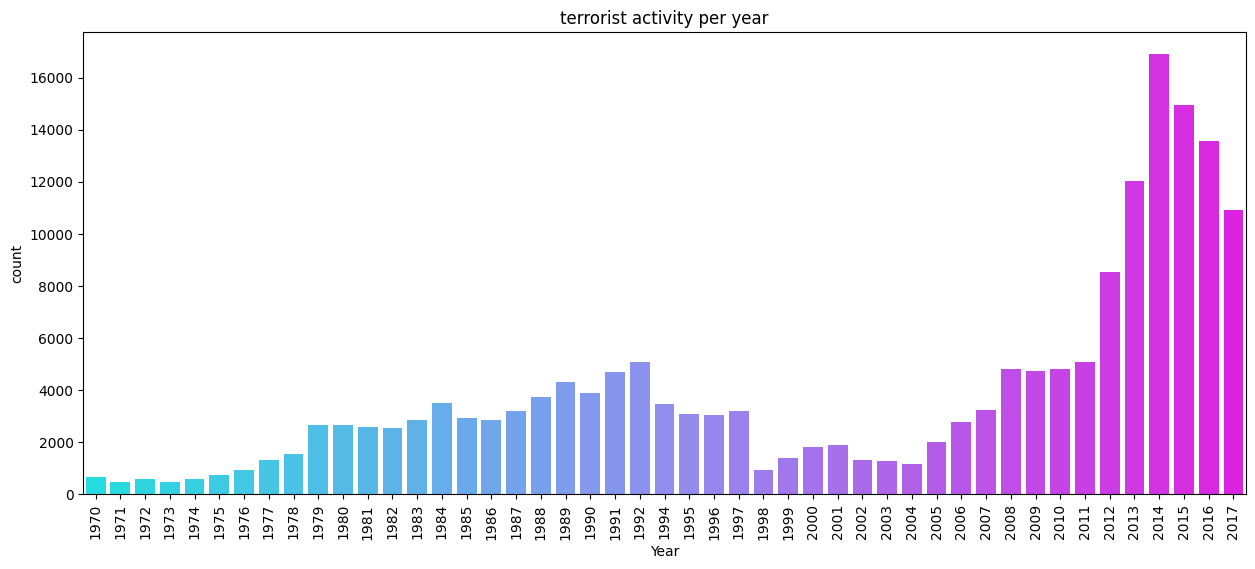

In [59]:
plt.subplots(figsize=(15,6))
sns.countplot(x = 'Year',data=data,palette='cool')
plt.xticks(rotation=90)
plt.title('terrorist activity per year')
plt.show()

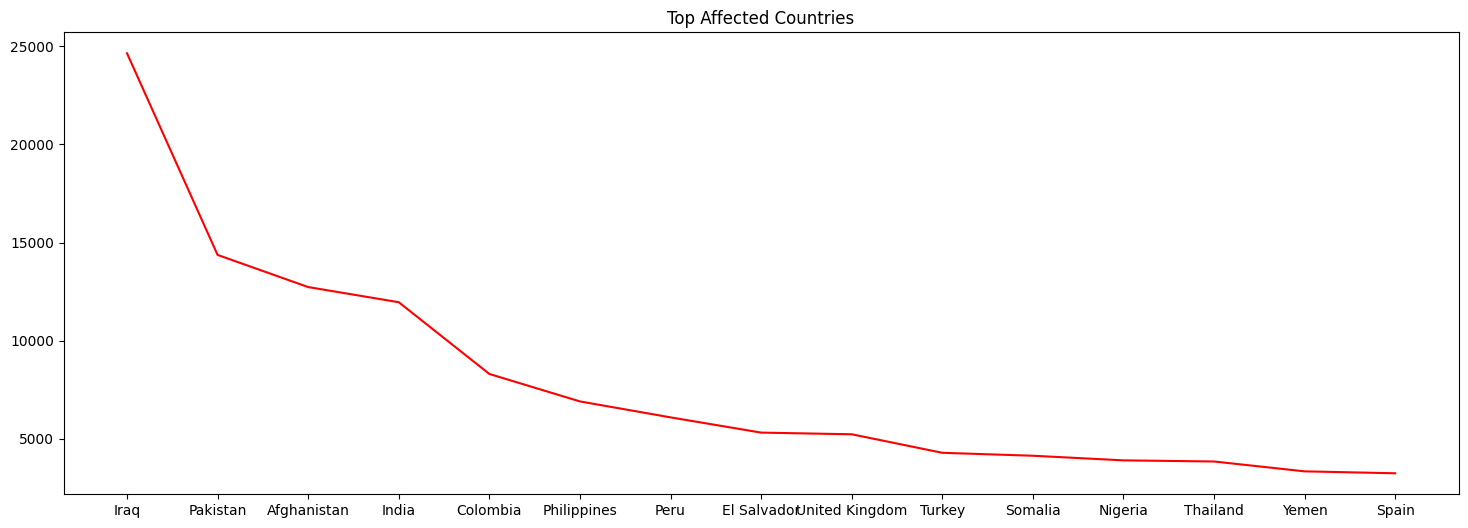

In [66]:
#terror activity by country
plt.subplots(figsize=(18,6))
plt.plot(data['Country'].value_counts()[:15].index,data['Country'].value_counts()[:15].values , color = 'red')
plt.title('Top Affected Countries')
plt.show()

<Figure size 1200x600 with 0 Axes>

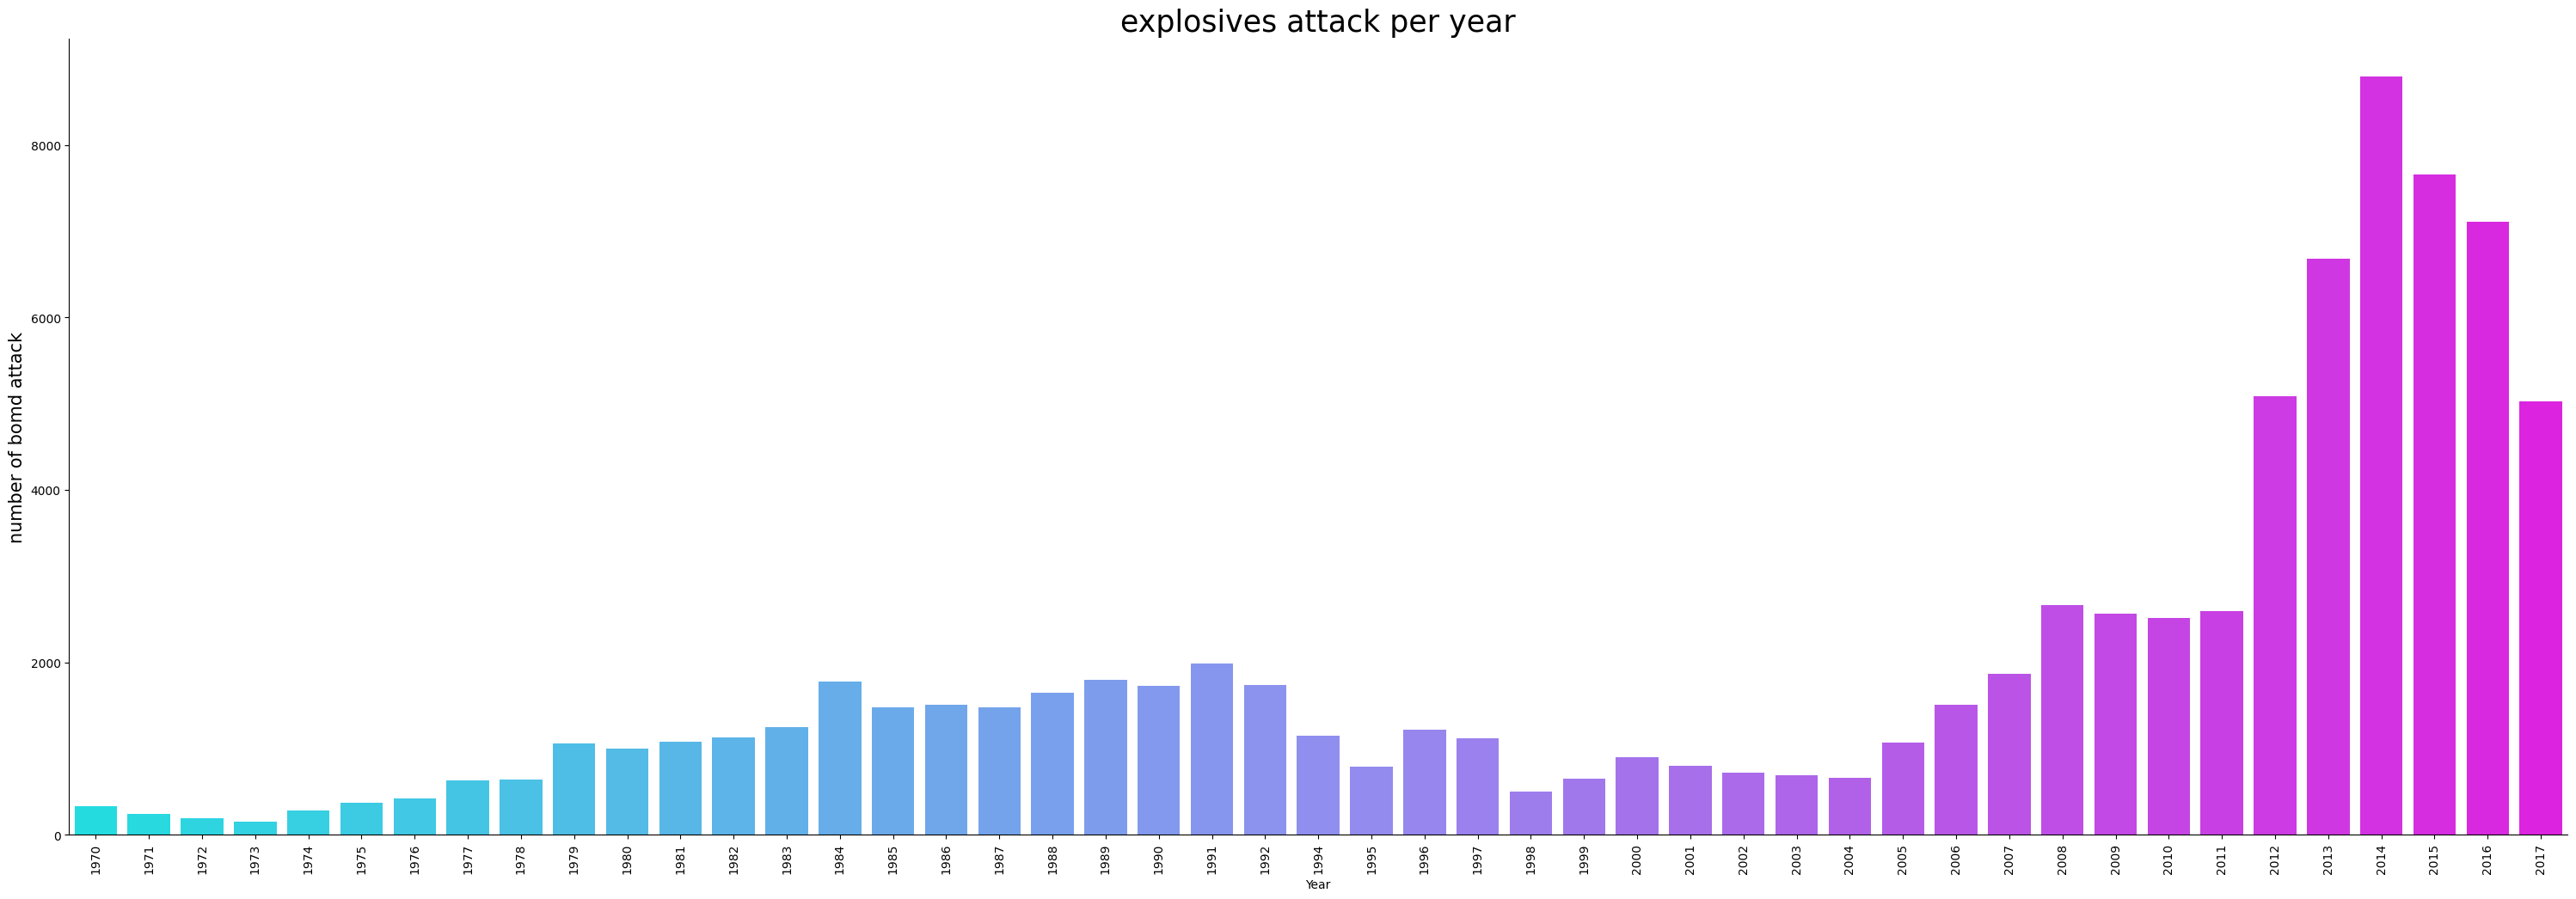

In [97]:
#number of bombing per year
plt.figure(figsize=(12, 6))
df = data[data['AttackType'] == 'Bombing/Explosion']
sns.catplot(x='Year',data=df,kind='count',height =10, aspect =3,  palette='cool')
plt.xticks(rotation=90)
plt.title('explosives attack per year', size =25)
plt.ylabel('number of bomd attack', size = 15)
plt.show()

#Conclusion/insights
Iraq has highest number of attack(24636)

Bombing/explosives was  mostly used (92426)

Private citizens and Property were the main targets

maximun terrorist attack happned in iraq

Taliban was the worst group with terror frequency of 7478

maximum explosives was used in 2014

Baghdad was a most terror region


#ThankYou